<p align="center">
    <img src="img/cesi.png">
</p>

# Bloc Algorithmique avancée

* *Hugo ANTOINE*
* *Adrien NICOLAS*
* *Valentin AVELANGE*
* *Sofian TERRAB*

## Sommaire

- [Contextualisation](#contextualisation)

- [Objectifs](#objectifs)

- [Contraintes](#contraintes)

- [Analyse](#analyse)

- [Modelisation](#modelisation)

- [Démonstration algorithmique np-complet](#démonstration-algorithmique-np-complet)

- [Conclusion](#conclusion)

- [Bibliographie](#bibliographie)


## Contextualisation

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de **nouvelles solutions de mobilité** pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé **plusieurs études sur le thème de la Mobilité Multimodale Intelligente.** Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

## Objectifs

L'étude est orientée sur la **gestion de tournées de livraison.** Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du **trafic prévu sur chaque axe** pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour **générer une tournée de livraison correspondant à ce problème.**

## Contraintes

Voici une liste de l'ensemble des contraintes qui pourraient être intégrées au périmètre de l'étude :

* Fenêtre de temps de livraison pour chaque objet

    * Interdiction de livrer hors de la fenêtre
    * Possibilité d'attendre sur place l'ouverture de la fenêtre temporelle

* k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.

    * Capacité des camions (2 ou 3 dimensions) et encombrement des objets
    * Certains objets ne peuvent être livrés que par certains camions

* Chaque objet a un point de collecte spécifique

* Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic

**La contrainte supplémentaire selectionnée pour notre problème sera le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), représentant la variation du trafic. L'algorithme pourra s'auto-adapter à cette variation, et proposer un chemin le plus court possible pour atteindre la destination en prenant en compte le trafic. Les arêtes ne seront alors plus pondérées par une distance, mais par un temps de parcours.**


## Analyse

Comme mentionné précédemment, l'idée est de proposer un algorithme, pour répondre au problème de la tournée sur un réseau routier reliant un sous-ensemble de ville tout en revenant au point de départ.
L'idée est donc de minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

Ce problème peut s'apparenter à un problème déjà résolu : le voyageur de commerce. Il s'agit d'un problème d'optimisation qui consiste à déterminer, étant donné une liste de villes et les distances entre toutes les paires de villes, le plus court circuit qui passe par chaque ville une et une seule fois.



<p align="center">
    <img src="img/map.png">
</p>

Ainsi, étant donné n points (des villes donc) ainsi que les distances associées, séparant chaque point, on cherche le chemin de longueur minimale passant exactement par chaque point et revenant au point de départ (ce qui s'apparente à un cycle).


D'une manière formelle, l'expression de l'instance de notre graphe est donc :
	
* ***G** = (**V**, **E**, **$\alpha$**)* avec **V** un ensemble de sommets, **E** un ensemble d'arêtes et **$\alpha$** une fonction de coût sur les arcs. Le problème est de trouver le plus court cycle hamiltonien dans le graphe G.

Le problème de l'existence d'un circuit est NP-complet pour les circuits Hamiltoniens.
Pour le problème du plus court de parcours, des algorithmes
spécifiques peuvent être proposés quand il s'agit d'une distance L1, L2 ou L , (par exemple, en procédant à
**une triangulation de Delaunay de l'espace géographique sous-jacent**). 

Enfin, ce problème du voyageur peut être envisagé avec des contraintes supplémentaires. Les plus
courantes viennent du domaine du transport et sont liées soit à une formulation temporelle, soit à des
problèmes de capacité. Dans notre cas, et pour être le plus simple, nous allons ajouter la contrainte représentant la variation du trafic, faisant varier les poids d'arêtes en particuliers.


## Modelisation

Le problème du voyageur de commerce est un problème d'optimisation qui consiste à déterminer le plus court circuit qui passe par chaque point (relié par des arêtes) une seule fois en revenant au point de départ (dans la plupart du temps, les "points" sont des villes). Le but, trouver un circuit de poids minimal qui passe part toutes les étapes une seule fois exactement. Hélas, on ne connaît pas d'algo nous permettant de trouver une solution exacte rapidement dans tous les cas. Le problème du voyageur de commerce est un problème NP-Complet.

Dans cette partie, on va voir comment résoudre notre problème en expliquant point par point le problème du voyageur de commerce. 
On a donc modélisé notre problème (c'est à dire traduire ce dernier) sous différents points.

Problème du voyageur de commerce:   
* **Graphe non orienté complet avec poids entiers positifs sur chaque arrête et un entier k (positif).**   
* **Dans un graphe complet -> arrête(n-1) entre chaque paire de sommet (n)**   
* **Savoir si le graphe présente un circuit qui passe par tous les sommets et dont le poids totale est < à k**   
* **Montrer que probleme est NP-difficile avec réduction à partir du problème de circuit hamiltonien**   
* **Construction d'un graphe complet G' avec même sommets que G -> fixer le poids de l'arête (u,v) à 0 si (u,v) est une arête de G. A 1 si l'arête (u,v) n'existe pas dans G. Fixer k = 0.**   
* **Réduction -> se fait en un temps polynomial fonction de la taille de G, car elle ajoute au plus n(n-1) sommets.**   
* **Prouver que la réduction fonctionne -> montrer que G possède un circtui hamiltonien si et seulement si G' comprend un circuit de poids 0 qui passe par tous les sommet**


### Démonstration algorithmique np-complet

* La premiere etape est de poser notre **problème d'optimisation** et de **décision** lié au probleme de base : 

    * Problème d'optimisation (P1) :

        *  Données : ***G** = (**V**, **E**, **$\alpha$**)* avec **V** un ensemble de sommets, **E** un ensemble d'arêtes et **$\alpha$** une fonction de coût sur les arcs et v $\in$ V.
        *  Question : **Quel est le cylce hamiltonien le plus court partant de de v** 

    * Problème de réduction :

        *  Données : ***G** = (**V**, **E**, **$\alpha$**)* avec **V** un ensemble de sommets, **E** un ensemble d'arêtes et **$\alpha$** une fonction de coût sur les arcs et v $\in$ V et k $\in$ Z.
        *  Question : **Existe t-il un cycle hamiltonien dont la longueur est $\le$ k**
     
<p align="center">
    <img src="img/graph.png" width="50%">
</p>

### Démarche scientifique 

On cherche à determiner quel est la compléxité du problème  permettant de trouver le cycle hamiltonien le plus court partant de v dans le graphe **G**.

On sait que la compléxité du problème permettant de determiner le cycle hamiltonien le plus court partant de v dans le graphe complet pondéré **P2** est np-complet

On va donc réduire le probleme **(P1)** au problème **(P2)**

On choisit une instance **I1** de notre probleme **(P1)**

On va reduire l'instance **I1** à une instance **I2** de notre probleme **(P2)** 


* Pour ce faire, on va utiliser l'algo suivant :

```
        Pour chaque cellules de la matrice :
            Si pas de liaison (hors diagonal):
                On cherche le chemin le plus court entre les deux sommets (algo D)
                On pondère cette arrête avec la distance obtenue
                On stocke le plus court chemin obtenu
```

* Parcours de la matrice : **n<sup>2</sup> <br/>**
* Algorithme D : **nlog(n)** <br/>
* Ponderation d'une arrête (écriture en mémoire) : **1** <br/>
* Stockage du chemin le plus court obtenu (écriture en mémoire) : **1** <br/>
* ***n<sup>2</sup> (nlog(n) + 1 + 1) $\to$ n<sup>3</sup>logn $\to$ polynomial***

            
**I1** est reductible à **I2** en temps polynomial. Donc **P1** est au moins aussi difficile que **P2** : **P1** $\ge$ **P2** : 
* **P1** est donc **NP-difficile**

### Algorithme de certification :

En informatique théorique, plus précisément en théorie de la complexité des algorithmes, un certificat est, de façon simplifiée, une information permettant de certifier que l'entrée est correcte.
En particulier un problème de décision est dans la classe NP s'il existe pour chaque donnée ayant une réponse positive un certificat polynomial, c'est-à-dire s'il existe pour chaque donnée pour laquelle la réponse est « oui », un certificat de longueur polynomiale en la taille de la donnée, tel que la vérification de la réponse pour la donnée munie de son certificat se réalise en temps polynomial

```
    On vérifie si un cycle du graphe est existant, c’est-à-dire s’il existe dans l'instance une arête entre chaque paire de sommets successifs du graphe
    On parcourt le graphe pour vérifier que chaque sommet de l'instance n'y apparit qu'une seule fois
    On calcule la longueur du circuit et on verifie si la longueur est inferieure à k 
    On verifie si le début et l'arrivée sont les memes

```

### 



## Conclusion

Pour conclure, grace aux rcherches effectuées, nous avons pu realiser une esquisse de la modelisation de notre probleme en proposant une reduction du probleme à un autre. De ce fait, les propriétés théoriques, notamment de complexité ont pu etre abordés pour notre cas.

La conclusion generale de notre probleme d'apres la demonstration est que le problème du voyageur de commerce est NP-complet.


## Bibliographie

source **Analyse** : http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf

source **Modelisation** : https://univ.scholarvox.com/catalog/book/docid/88817457?searchterm=algorithmes

source **Modelisation** : http://adrien.cazaban.free.fr/files/OptiCombi_PVC_RapportEtComparatifs.pdf.

source **Modelisation** / **Algorithme de certification**: https://fr.wikipedia.org/wiki/Certificat_(complexit%C3%A9)



# Modélisation linéaire


### Variables de décision du programme

$\forall$ $i \in {\{1,2,\ldots,n\}}$, $\forall$ $j \in {\{1,2,\ldots,n\}}$, $X_{i,j} \in {\{0;1}\}^{n^2}$, $P_{i,j} \in {\mathbb{R}_{+}^{*n^{2}}}$
$X_{i,j}$  : Chemin parcouru </br>
$P_{i,j}$ : Poids des arêtes</br>


### Contraintes du programme

C1 : $ (\sum_{j=1}^{n} X_{i,j} = 1)$  Somme des entrant </br>
</br>
C2 : $ (\sum_{i=1}^{n} X_{i,j} = 1)$  Somme des sortant </br>
</br>

C3 : $ (\sum_{i=1}^{n} X_{i,i} = 0)$  Somme de la liaison identique (X_0_0) </br>
</br>

C4 : Depuis un certain chemin referençant le cycle le plus court : $[0,1,\ldots,0]$, la distance de l'un de ses sommets contenus doit être compris dans L'intervalle de temps $[0,n]$ avec $n \in \mathbb{R}_{+}$


###  Fonction économique

Min Z = $ \sum_{i=1}^{n}\sum_{j=1}^{n} X_{i,j}(P_{i,j}+T_{i,j}) $




## Implémentation de la fonction linéaire 


Premierement, on definit deux fonctions qui vont nous permettre de visualiser comment se comporte notre simplexe, et ce que ceui -ci va nous retoruner. De ce fait, une fonction permerttra de'afficher un graph particulier en fonction *plot_graph* de son nombre de sommet et de son chemin renvoyé par le simplexe.


La seonde fonction va nous permettre d'obtenir la chemin complet de notre graphe en prenant en compte le graphe non complet complet generé precedemment.


In [5]:
def plot_graph(path, graph, all_vertex, all_verticies, start_vertex):
  for i in range(len(graph) - 1):
    for j in range(i + 1, len(graph)):
      if graph[i, j] != np.inf:
        x = [all_vertex[i][0], all_vertex[j][0]]
        y = [all_vertex[i][1], all_vertex[j][1]]
        plt.plot(x, y, color = "gray")
  for i in range(len(path) - 1):
    x = [all_vertex[path[i]][0], all_vertex[path[i+1]][0]]
    y = [all_vertex[path[i]][1], all_vertex[path[i+1]][1]]
    plt.plot(x, y, color = "red")
  for i in range(len(all_vertex)):
    if(i == start_vertex):
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "blue")
    elif(i in all_verticies):
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "green")
    else: 
      plt.scatter(all_vertex[i][0], all_vertex[i][1], color = "gray")
    plt.text(all_vertex[i][0] - 10, all_vertex[i][1] + 20, str(i))
  plt.show()

def get_complete_path(path, all_paths):
  complete_path = []
  for i in range(len(path) - 1):
    complete_path.extend(all_paths[(path[i], path[i+1])][:-1])
    if i == len(path) - 2:
      complete_path.append(all_paths[(path[i], path[i+1])][-1])
  return complete_path

Pour ce qui est de la génération de l'instance, un fichier ipynb *generate_matrix_ziozi* permet de generer des fichier sous le format pickle, correspondant à un objet python. Cet objet va nous renvoyer un graph, ainsi que son graph compelt associé. On aura aussi l'ensemble des caracteristiques concernant ces instances ci (tout est paramettrable dans le fichiers, dont le nombre de villes à selectinné, et l'ordre du graph non complet de base).

In [6]:
import pickle
with open("../code/data_small.pickle", "rb") as file:
  data = pickle.load(file)


graph = data["graph"]
complete_graph = data["complete_graph"]
all_paths = data["all_paths"]
vertices_list = data["vertices_list"]
start_vertex = data["start_vertex"]
start_vertex_index = data["start_vertex_index"]
interval_vertex = data["interval_vertex"]
interval_vertex_index = data["interval_vertex_index"]
interval = data["interval"]
all_vertex = data["all_vertex"]



Enfin, voici notre Simplexe, celui va prendre en compte l'ensemble de nos variables de decisions, les contraintes, et la fonction économique. Il va nous permettre d'avoir la reponse exacte du chemin le plus court au sein de nos instances, et de definir ainsi dans notre cas, la borne inferieure de la fonction économique.

-----------------
-----------------
1 Optimal 8069.028728027086
route_plan [[(0, 5), (5, 27), (27, 33), (33, 13), (13, 4), (4, 32), (32, 25), (25, 14), (14, 41), (41, 8), (8, 49), (49, 21), (21, 23), (23, 42), (42, 20), (20, 28), (28, 22), (22, 15), (15, 7), (7, 30), (30, 40), (40, 35), (35, 9), (9, 31), (31, 45), (45, 18), (18, 37), (37, 29), (29, 44), (44, 26), (26, 17), (17, 3), (3, 36), (36, 38), (38, 1), (1, 34), (34, 19), (19, 48), (48, 11), (11, 2), (2, 46), (46, 10), (10, 12), (12, 6), (6, 43), (43, 39), (39, 16), (16, 24), (24, 47), (47, 0)]]
liste_route_plan [0, 5, 27, 33, 13, 4, 32, 25, 14, 41, 8, 49, 21, 23, 42, 20, 28, 22, 15, 7, 30, 40, 35, 9, 31, 45, 18, 37, 29, 44, 26, 17, 3, 36, 38, 1, 34, 19, 48, 11, 2, 46, 10, 12, 6, 43, 39, 16, 24, 47, 0]
no. of times LP model is solved =  12
subtour log (no. of subtours in each solution)) [11, 11, 5, 3, 2, 2, 2, 2, 3, 3, 3, 1]
Time taken by DFJ formulation =  16.15596580505371


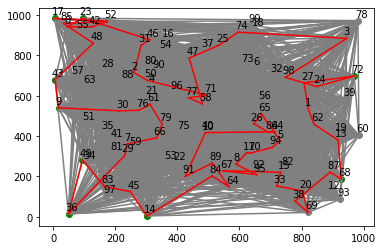

In [8]:
#import libraries
%matplotlib inline
import pulp
import pandas as pd
from matplotlib import pyplot as plt
import time
import copy
import numpy as np


# this function find all the subtour in the LP solution.
def get_plan(r0):
    r=copy.copy(r0)
    route = []
    while len(r) != 0:
        plan = [r[0]]
        del (r[0])
        l = 0
        while len(plan) > l:
            l = len(plan)
            for i, j in enumerate(r):
                if plan[-1][1] == j[0]:
                    plan.append(j)
                    del (r[i])
        route.append(plan)
    return(route)


def Simplex(complete_graph):

    no_of_locs = len(complete_graph)


    dis_mat= complete_graph

    start_t_1=time.time()
    model=pulp.LpProblem('tsp',pulp.LpMinimize)
    #define variable
    x=pulp.LpVariable.dicts("x",((i,j) for i in range(no_of_locs) \
                                    for j in range(no_of_locs)),\
                            cat='Binary')
    #set objective
    model+=pulp.lpSum(dis_mat[i][j]* x[i,j] for i in range(no_of_locs) \
                        for j in range(no_of_locs))
    # st constraints
    for i in range(no_of_locs):
        model+=x[i,i]==0
        model+=pulp.lpSum(x[i,j] for j in range(no_of_locs))==1
        model += pulp.lpSum(x[j, i] for j in range(no_of_locs)) == 1
        
        
    status=model.solve()



    route=[(i,j) for i in range(no_of_locs) \
            for j in range(no_of_locs) if pulp.value(x[i,j])==1]
    route_plan=get_plan(route)
    subtour=[]

    while len(route_plan)!=1:
        for i in range(len(route_plan)):
            model+=pulp.lpSum(x[route_plan[i][j][0],route_plan[i][j][1]]\
                                for j in range(len(route_plan[i])))<=\
                                len(route_plan[i])-1


        status=model.solve()
        route = [(i, j) for i in range(no_of_locs) \
                    for j in range(no_of_locs) if pulp.value(x[i, j]) == 1]
        route_plan = get_plan(route)
        
        subtour.append(len(route_plan))

    print("-----------------")
    print(status,pulp.LpStatus[status],pulp.value(model.objective))
    print("route_plan",route_plan)

    out = [item for t in route_plan[0] for item in t]
    liste_out = list(dict.fromkeys(out))
    liste_out.insert(len(liste_out), liste_out[0])
    print("liste_route_plan",liste_out)
    


    print("no. of times LP model is solved = ",len(subtour))
    print("subtour log (no. of subtours in each solution))",subtour)
    print("Time taken by DFJ formulation = ", time.time()-start_t_1)

    return liste_out,pulp.value(model.objective)

print("-----------------")
liste_out,distance_obj = Simplex(complete_graph)
"""while is_path_in_interval(liste_out, complete_graph, interval, interval_vertex_index) != True:
        print("path is not in interval")
        liste_out,distance_obj = Simplex(complete_graph)"""

complete_path = get_complete_path(liste_out, all_paths)
plot_graph(complete_path, graph, all_vertex, vertices_list, start_vertex)




Le graph d'arriere plan est donc notr egraph generé precedemment, et de ce graphe, nous avons selectionné un certains nombres de villes, pour pouvoir y trouver le plus court chemin passant par celles-ci. D'apres notre smplexe, le temps minimal (ou la distance) de ce chemin est donner, ainsi que la route precise (representé par le graphique ci-dessus).